#### Import

In [1]:
import sys
sys.path.insert(0,'..')
import urx
import time
import math3d as m3d
ur = urx.Robot("192.168.1.10", use_rt=True)
pose = ur.get_pose()
print(pose)
from ddh import DDGripper
from scooping_primitives import HighSpeedScooping
from data_logger import DataLogger
from jupyterthemes import jtplot
white = 0
if white:
    jtplot.style(theme='default', figsize=(25, 8))
else:
    jtplot.style(figsize=(25, 8))

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


importing urx from /high_speed_scooping
<Transform:
<Orientation: 
array([[-3.03079805e-05, -7.66075824e-01, -6.42750208e-01],
       [-1.02772372e-05, -6.42750208e-01,  7.66075825e-01],
       [-9.99999999e-01,  2.98239075e-05,  1.16073178e-05]])>
<Vector: (-0.16946, 0.77003, 0.19501)>
>


In [2]:
gripper = DDGripper("ddh_scooping")
scoop = HighSpeedScooping(ur, gripper, "hss_wall_side_book")
logger = DataLogger(ur, gripper, scoop)

reading gripper config...
connecting to odrive...
found left finger
found right fingers
reading scooping config...


In [64]:
scoop.initialize_pose((-0.505,0.45,180))
# gripper.disarm('L') # for fragile

Setting left tip: (157.5343583888875, 20.06213335917993)
Setting right tip: (99.04068590741244, 19.77217768300693)
Setting pose: 
[-0.5245      0.45        0.3        -1.81679144 -1.81679144  0.66125801]


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/john/anaconda3/envs/scoop/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "../urx/ursecmon.py", line 293, in run
    data = self._get_data()
  File "../urx/ursecmon.py", line 340, in _get_data
    tmp = self._s_secondary.recv(1024)
socket.timeout: timed out



Start logging
Collision detected!
Setting left tip: (145, 60)
Setting right tip: (145, -60)
Reached zero speed!


/home/john/high_speed_scooping/script/ddh.py:263: RuntimeWarning: invalid value encountered in sqrt
  distal_r = np.sqrt(self.geometry_l2**2 - (self.geometry_l1*np.sin(deg2rad(self.right_a2)))**2)


==========Scooping completed!==========
Speed at collision: -0.29910 m/s
Distance to decelerate: 0.05185 m
Deceleration for lifting: 2.23651 m/s^2
Slept time for lifting: 0.80 s
Lifted distance: 0.24628 m
Stop logging
Collision time: 1433 ms


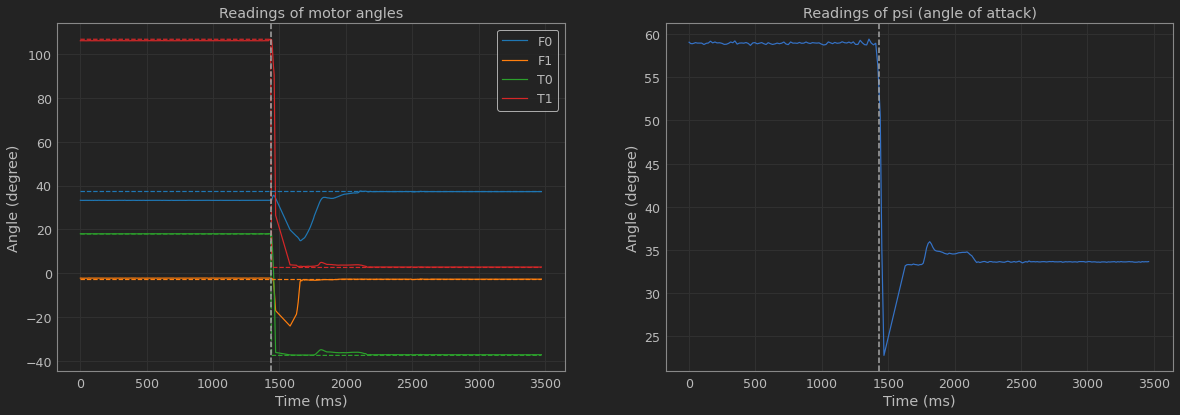

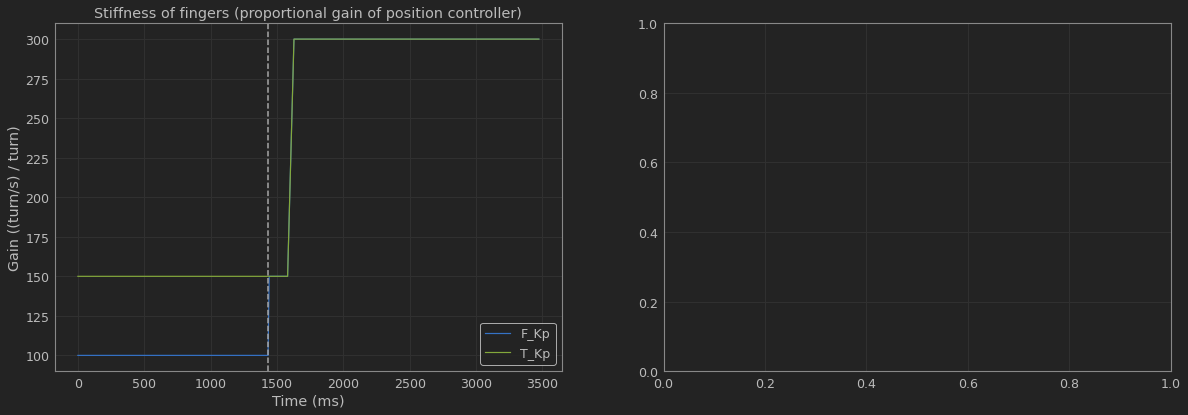

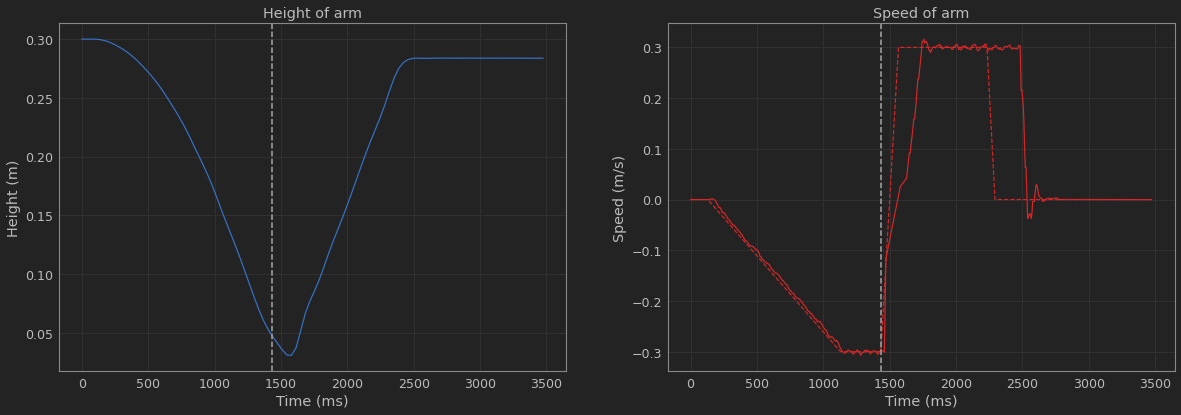

In [105]:
logger.logged = True
scoop.simple_scoop()
logger.logged = False
logger.plot_data(False)

#### picking book from wall, side scoop

In [62]:
scoop.wall_init(-0.15, 8, True)

Setting left tip: (105.16904145236427, -24.914478560499248)
Setting right tip: (157.5343583888875, -20.06213335917993)
Setting pose: 
[-0.1695      0.77        0.195      -1.70212414  0.79371352  1.70212414]


In [61]:
scoop.wall_scoop(True)

Collision detected!
Setting left tip: (145, 60)
Setting right tip: (145, -60)
Reached zero speed!
==========Scooping completed!==========
Speed at collision: 0.29993 m/s
Distance to decelerate: 1.03860 m
Deceleration for lifting: 4.49789 m/s^2
Slept time for lifting: 0.00 s
Lifted distance: 0.77002 m


#### picking book from wall 

In [63]:
scoop.wall_init(-0.2, 20)

Setting left tip: (114.361574769792, -32.62792987673771)
Setting right tip: (157.5343583888875, -20.06213335917993)
Setting pose: 
[-0.2         0.77        0.0305     -2.26892803  0.          0.        ]


In [7]:
scoop.wall_scoop()

Collision detected!
Setting left tip: (145, 60)
Setting right tip: (145, -60)
Reached zero speed!
==========Scooping completed!==========
Speed at collision: 0.30280 m/s
Distance to decelerate: 1.03865 m
Deceleration for lifting: 2.29225 m/s^2
Slept time for lifting: 0.00 s
Lifted distance: 0.99913 m


#### Input Bandwidth Testing

In [4]:
gripper.set_left_tip((157, 40))
gripper.set_right_tip((157, -40))

Setting left tip: (157, 40)
Setting right tip: (157, -40)


In [ ]:
logger.logged = True
gripper.arm(BW=100)
gripper.set_left_tip((150,0))
gripper.set_right_tip((150,0))
time.sleep(1)
logger.logged = False
logger.plot_data(True)

#### script testing

In [4]:
# book grasp
gripper.arm(pos_gain=300)
gripper.set_left_tip((145, 60))
gripper.set_right_tip((145, -60))
# gripper.set_parallel_jaw(-14.5, 0)

Setting left tip: (145, 60)
Setting right tip: (145, -60)


In [26]:
gripper.disarm()

In [5]:
gripper.set_left_tip((140, 20))
gripper.set_right_tip((140, -20))

Setting left tip: (140, 20)
Setting right tip: (140, -20)


In [ ]:
gripper.set_left_tip((158, 38))
gripper.set_right_tip((158, -38))

#### deceleration control and end pos control

In [ ]:
ur.speedl([0.4,0,0,0,0,0],0.4,10)

In [ ]:
# print(ur.get_tcp_speed(wait=False)[0])
stop_dist = 0.05
end_dist = 0.3
reverse_vel = 0.4
spd_detect = ur.get_tcp_speed(wait=False)[0]
stop_dec = (spd_detect**2)/(2*stop_dist)
ur.speedl([-reverse_vel,0,0,0,0,0],stop_dec,10)
pos_dec = ur.getl()[0]
while ur.get_tcp_speed(wait=False)[0] > 0:
    continue
pos_stop = ur.getl()[0]
print("Reach zero vel!")
t_acc = reverse_vel / stop_dec
s_acc = 0.5 * stop_dec * t_acc**2
t_const = (end_dist-s_acc) / reverse_vel
print(s_acc)
print(t_acc+t_const)
time.sleep(t_acc+t_const)
ur.stopl(5)
pos_end = ur.getl()[0]

In [ ]:
ur.stopl(2)
stop_dist = pos_stop - pos_dec
reverse_dist = pos_end - pos_stop
print(spd_detect)
print(stop_dec)
print(stop_dist)
print(reverse_dist)

In [ ]:
pose = ur.get_pose()
print(pose)
print(ur.getl())

#### scooping test

In [ ]:
scoop.prescoop_initialize((-0.509,0.45,180))
time.sleep(0.5)
a2_init = gripper.right_a2

In [ ]:
# smack and scoop
smack_vel = 0.3 #100
smack_acc = 0.3 #0.3
stop_smack_acc = 3 #7
reverse_vel = 0.3 # 250
reverse_acc = 0.35 #1
stop_acc = 0.5 #0.5
stop_dist = 0.01

# robot accelerate
ur.speedl([0,0,-smack_vel,0,0,0],smack_acc,5)
# robot detect collision, then stop, close gripper, and go up
while 1:
    a2_cur = gripper.right_a2
    #print(a2_cur)
    if a2_cur - a2_init > 0.3:
        print ("Collision detected!")
        z_spd = ur.get_tcp_speed(wait=False)[2]
        stop_dec = (z_spd**2)/(2*stop_dist)
        gripper.set_stiffness(20, 'R')
#         gripper.set_left_tip((158, 38))
#         gripper.set_right_tip((158, -38))
        gripper.set_left_tip((157, 41))
        gripper.set_right_tip((157, -41))
#         ur.stopl(stop_smack_acc)
        gripper.set_stiffness(100)
        ur.speedl([0,0,reverse_vel,0,0,0],stop_smack_acc,5)
        time.sleep(0.2)
        ur.stopl(stop_acc)
        break

In [ ]:
print(z_spd)
print(stop_dec)

In [ ]:
gripper.set_left_tip((157, 41))
gripper.set_right_tip((157, -41))

In [ ]:
ur.stopl()